<h3>This is the solution for building a classifier for filtering spam on Youtube</h3>

<h4>First, we convert the data format to csv and load data using pandas.</h4>

In [45]:

import pandas as pd 
  
df = pd.DataFrame(pd.read_excel("yt_test.xlsx")) 
df.to_csv("yt_test.csv")

In [46]:
yt_test=pd.read_csv("yt_test.csv")
yt_train=pd.read_csv("yt_train.csv")


<h4>Check the training data and test data</h4>

In [47]:
yt_train.head()

,VIDEO,AUTHOR,DATE,TEXT,CLASS
0,pRpeEdMmmQ0,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0
1,pRpeEdMmmQ0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
2,pRpeEdMmmQ0,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
3,pRpeEdMmmQ0,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
4,pRpeEdMmmQ0,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0


In [48]:
yt_test.head()

,Unnamed: 0,VIDEO,AUTHOR,DATE,TEXT,CLASS
0,0,9bZkp7q19f0,Adele Lupei,2014-11-07T19:47:06,"Is this the video that started the whole ""got ...",0
1,1,9bZkp7q19f0,Daniel Istrati,2014-11-07T19:47:16,Can anyone sub to my channel? :Dï»¿,1
2,2,9bZkp7q19f0,Stronzo Chicheritr,2014-11-07T20:01:15,prehistoric song..has beenï»¿,0
3,3,9bZkp7q19f0,none dies virgin life fucks us all,2014-11-07T20:05:35,You think you're smart? Headbutt your f...,0
4,4,9bZkp7q19f0,JakeFrostMiner Palanca,2014-11-07T20:12:11,DISLIKE.. Now one knows REAL music - ex. Enime...,0


<h4>Check the author that are common in both training and testing</h4>

In [49]:
li1=yt_train["AUTHOR"].values
li2=yt_test["AUTHOR"].values
len1=len(li1)
len2=len(li2)
for i in range(len1):
    for j in range(len2):
        if li2[j]==li1[i]:
            print(li2[j])

Nathan Waterhouse
Mason Sieverding


Only 2 authors are common in train and test, therefore we would not consider author as important in this problem (just drop it)

<h4>Check table info and null values</h4>

In [50]:
yt_train.info()
yt_test.info()
yt_train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   VIDEO   798 non-null    object
 1   AUTHOR  798 non-null    object
 2   DATE    798 non-null    object
 3   TEXT    798 non-null    object
 4   CLASS   798 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 31.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  202 non-null    int64 
 1   VIDEO       202 non-null    object
 2   AUTHOR      202 non-null    object
 3   DATE        202 non-null    object
 4   TEXT        202 non-null    object
 5   CLASS       202 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.6+ KB


VIDEO     0
AUTHOR    0
DATE      0
TEXT      0
CLASS     0
dtype: int64

In [51]:
yt_test.isnull().sum()

Unnamed: 0    0
VIDEO         0
AUTHOR        0
DATE          0
TEXT          0
CLASS         0
dtype: int64

<h4>Split Training data into X,Y</h4>

In [52]:
yt_train_X=yt_train["TEXT"]
yt_train_Y=yt_train["CLASS"]

In [53]:
yt_train_X.head()

0                           Shakira is the best dancer
1                              Shakira u are so wiredo
2                                                  wow
3    I love this song for two reasons: 1.it is abou...
4    I love this song because we sing it at Camp al...
Name: TEXT, dtype: object

In [54]:
yt_train_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

<h4>Check distribution of Spam in training data</h4>

<Axes: xlabel='CLASS', ylabel='count'>

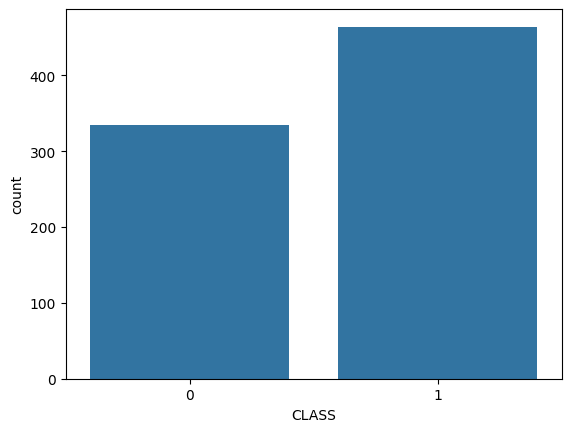

In [55]:
import seaborn as sns
sns.countplot(yt_train,x="CLASS")

<h4>Split the test data into X,Y</h4>

In [56]:
yt_test_X=yt_test["TEXT"]
yt_test_Y=yt_test["CLASS"]

<h3>Option 1a: Build a Linear Regression Model, using CountVectorizer for feature extraction</h3>

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression #use for 2 class classification
from sklearn.metrics import accuracy_score

cv = CountVectorizer()
x_train_feature = cv.fit_transform(yt_train_X)

model = LogisticRegression()
model.fit(x_train_feature,yt_train_Y)

LogisticRegression()

In [58]:
y_pred=model.predict(x_train_feature)
score=accuracy_score(yt_train_Y,y_pred)
print("score using train data is %s\n"%score)

score using train data is 0.9974937343358395



In [59]:
x_test_feature = cv.transform(yt_test_X)
y_pred=model.predict(x_test_feature)
score=accuracy_score(yt_test_Y,y_pred)
print("score using test data is %s\n"%score)

score using test data is 0.9603960396039604



<h3>Option 1b: Build a Linear Regression Model, using TfidVectorizer for feature extraction</h3>

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer # extract text->vector
from sklearn.linear_model import LogisticRegression #use for 2 class classification

tv=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_feature=tv.fit_transform(yt_train_X)
model = LogisticRegression()
model.fit(x_train_feature,yt_train_Y)

LogisticRegression()

In [71]:
y_pred=model.predict(x_train_feature)
score=accuracy_score(yt_train_Y,y_pred)
print("score using train data is %s\n"%score)

score using train data is 0.9799498746867168



In [72]:
x_test_feature=tv.transform(yt_test_X)
y_pred=model.predict(x_test_feature)
score=accuracy_score(yt_test_Y,y_pred)
print("score using test data is %s\n"%score)

score using test data is 0.9306930693069307

